# Exercise 7 - Penguins

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Get the data

In [4]:
df = sns.load_dataset('penguins')

### EDA - Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [8]:
df['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

In [9]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### Data Cleaning - Remove missing values

In [10]:
df_clean = df.dropna()

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### Determine target and features

In [174]:
target = 'sex'
features = ['species', 
            'island', 
            'bill_length_mm', 
            'bill_depth_mm', 
            'flipper_length_mm', 
            'body_mass_g']

print(target)
print(features)

sex
['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [175]:
df_target = df_clean[[target]]
df_features = df_clean[features]

print(df_target.shape)
print(df_features.shape)

(333, 1)
(333, 6)


### One-hot encoding

In [176]:
df_features_encoded = pd.get_dummies(df_features, dtype='int', drop_first=True)

In [177]:
df_features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   species_Chinstrap  333 non-null    int64  
 5   species_Gentoo     333 non-null    int64  
 6   island_Dream       333 non-null    int64  
 7   island_Torgersen   333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


In [248]:
df_features_encoded.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,0,1
6,38.9,17.8,181.0,3625.0,0,0,0,1
7,39.2,19.6,195.0,4675.0,0,0,0,1
12,41.1,17.6,182.0,3200.0,0,0,0,1
13,38.6,21.2,191.0,3800.0,0,0,0,1
14,34.6,21.1,198.0,4400.0,0,0,0,1


### Scaling

In [178]:
from sklearn.preprocessing import MinMaxScaler

In [179]:
scaler = MinMaxScaler().set_output(transform='pandas')

scaler.fit(df_features_encoded)

df_features_scaled = scaler.transform(df_features_encoded)

In [180]:
df_features_scaled.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.432465,0.483912,0.490966,0.418627,0.204204,0.357357,0.369369,0.141141
std,0.198861,0.234433,0.237555,0.223671,0.403726,0.479942,0.483360,0.348691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.305085,0.236111,0.000000,0.000000,0.000000,0.000000
50%,0.450909,0.500000,0.423729,0.375000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.666667,0.694915,0.576389,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split in Training en Test dataset

In [181]:
from sklearn.model_selection import train_test_split

In [193]:
df_features_train, df_features_test, df_target_train, df_target_test = \
    train_test_split(df_features_scaled, df_target, test_size=0.3, random_state=3)

In [194]:
print(df_features_train.shape)
print(df_features_test.shape)
print(df_target_train.shape)
print(df_target_test.shape)

(233, 8)
(100, 8)
(233, 1)
(100, 1)


### Classification

In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [208]:
classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(df_features_train, df_target_train[target])

predicted = classifier.predict(df_features_test)

In [209]:
accuracy = sum(predicted == df_target_test[target]) / len(df_target_test)
accuracy

0.92

In [201]:
df_target_test['predicted_NN5'] = predicted
df_target_test['correct_NN5'] = predicted == df_target_test[target]

df_target_test

,sex,predicted_NN5,correct_NN5
124,Female,Female,True
159,Male,Male,True
309,Male,Male,True
20,Female,Male,False
90,Female,Female,True
...,...,...,...
148,Female,Female,True
64,Female,Female,True
48,Female,Female,True
5,Male,Male,True


### Comparing different algorithms

In [280]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [287]:
algorithms = {
    'Nearest Neighbor (k = 3)': KNeighborsClassifier(n_neighbors = 3),   
    'Nearest Neighbor (k = 5)': KNeighborsClassifier(n_neighbors = 5),
    'Nearest Neighbor (k = 7)': KNeighborsClassifier(n_neighbors = 7),
    'Nearest Neighbor (k = 9)': KNeighborsClassifier(n_neighbors = 9),
    'Nearest Neighbor (k = 11)': KNeighborsClassifier(n_neighbors = 11),
    'Nearest Neighbor (k = 13)': KNeighborsClassifier(n_neighbors = 13),
    'Naive Bayes': GaussianNB(),
    'Decision Tree (max_depth = 5)': DecisionTreeClassifier(max_depth = 5, random_state = 2025),
    'Random Forest (max_depth = 5)': RandomForestClassifier(max_depth = 5),
    'Logistic Regression': LogisticRegression(),
    'SVM (kernel="linear")': SVC(kernel='linear'),
    'SVM (kernel="rbf")': SVC(kernel='rbf'),
    'MLP': MLPClassifier(max_iter=1000, hidden_layer_sizes=(40, 25, 10)),
}

In [288]:
results = []
for name, classifier in algorithms.items():

    classifier.fit(df_features_train, df_target_train[target])
    predicted = classifier.predict(df_features_test)
    accuracy = accuracy_score(df_target_test[target], predicted)

    results.append({'name': name, 'accuracy': accuracy})
    print(name, accuracy)

Nearest Neighbor (k = 3) 0.87
Nearest Neighbor (k = 5) 0.92
Nearest Neighbor (k = 7) 0.91
Nearest Neighbor (k = 9) 0.91
Nearest Neighbor (k = 11) 0.91
Nearest Neighbor (k = 13) 0.89
Naive Bayes 0.7
Decision Tree (max_depth = 5) 0.84
Random Forest (max_depth = 5) 0.91
Logistic Regression 0.93
SVM (kernel="linear") 0.92
SVM (kernel="rbf") 0.9
MLP 0.9


In [267]:
df_results = pd.DataFrame(results)
df_results

,name,accuracy
0,Nearest Neighbor (k = 3),0.87
1,Nearest Neighbor (k = 5),0.92
2,Nearest Neighbor (k = 7),0.91
3,Nearest Neighbor (k = 9),0.91
4,Nearest Neighbor (k = 11),0.91
5,Nearest Neighbor (k = 13),0.89
6,Naive Bayes,0.70
7,Decision Tree (max_depth = 5),0.84
8,Random Forest (max_depth = 5),0.89


In [217]:
results

[{'name': 'Nearest Neighbor (k = 3)', 'accuracy': 0.87},
 {'name': 'Nearest Neighbor (k = 5)', 'accuracy': 0.92},
 {'name': 'Nearest Neighbor (k = 7)', 'accuracy': 0.91},
 {'name': 'Nearest Neighbor (k = 9)', 'accuracy': 0.91},
 {'name': 'Nearest Neighbor (k = 11)', 'accuracy': 0.91},
 {'name': 'Nearest Neighbor (k = 13)', 'accuracy': 0.89}]

In [259]:
classifier = DecisionTreeClassifier(max_depth = 5, random_state = 2025)

classifier.fit(df_features_train, df_target_train[target])
predicted = classifier.predict(df_features_test)
accuracy = accuracy_score(df_target_test[target], predicted)

accuracy

0.84

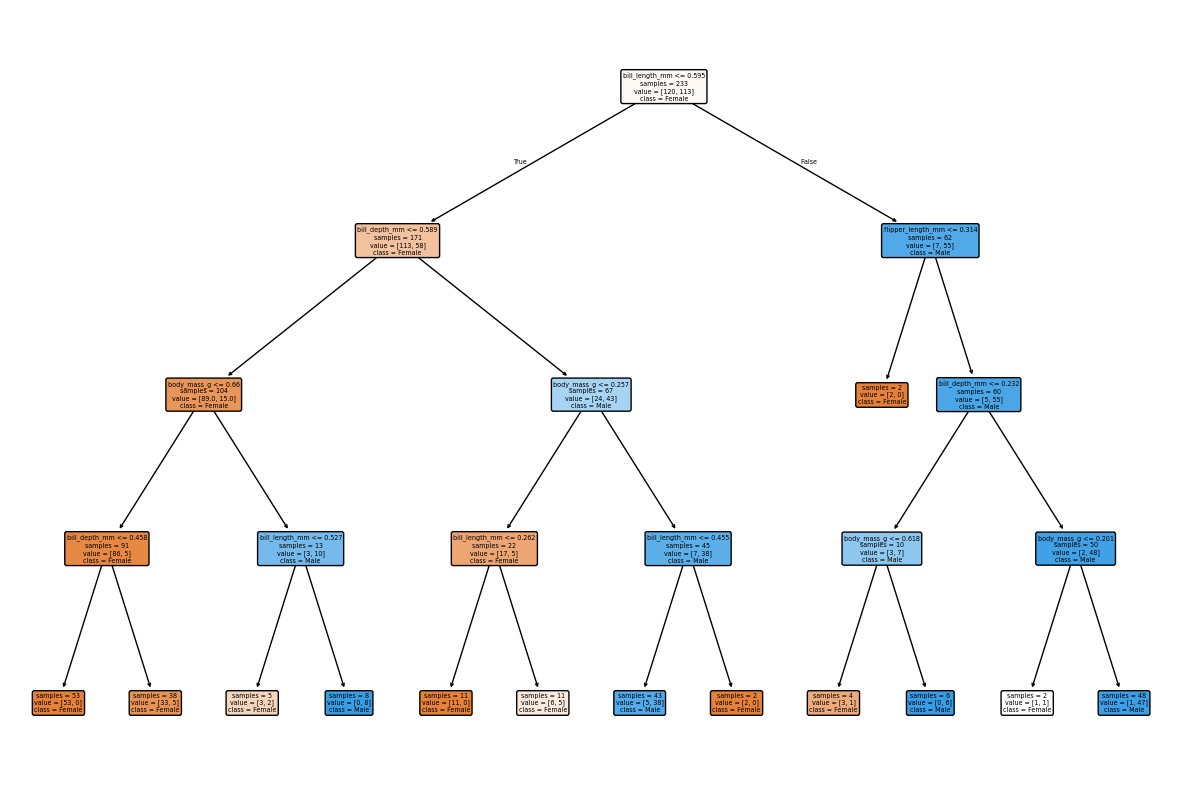

In [256]:
from sklearn.tree import plot_tree

plt.figure(figsize = (15, 10))

plot_tree(classifier, 
          feature_names = df_features_train.columns,
          class_names = df_target_train[target].unique(),
          filled = True,
          rounded = True, 
          impurity = False)

plt.show()

In [246]:
d = dict(zip(df_features_train.columns, 
             classifier.feature_importances_))

for k, v in d.items():
    print(f'{k:20} : {v:.2f}')

bill_length_mm       : 0.31
bill_depth_mm        : 0.25
flipper_length_mm    : 0.05
body_mass_g          : 0.31
species_Chinstrap    : 0.06
species_Gentoo       : 0.00
island_Dream         : 0.00
island_Torgersen     : 0.01


In [254]:
from sklearn.tree import export_text

print(export_text(classifier, 
                  feature_names = df_features_train.columns))

|--- bill_length_mm <= 0.59
|   |--- bill_depth_mm <= 0.59
|   |   |--- body_mass_g <= 0.66
|   |   |   |--- bill_depth_mm <= 0.46
|   |   |   |   |--- class: Female
|   |   |   |--- bill_depth_mm >  0.46
|   |   |   |   |--- body_mass_g <= 0.28
|   |   |   |   |   |--- bill_depth_mm <= 0.49
|   |   |   |   |   |   |--- bill_depth_mm <= 0.48
|   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |--- bill_depth_mm >  0.48
|   |   |   |   |   |   |   |--- class: Male
|   |   |   |   |   |--- bill_depth_mm >  0.49
|   |   |   |   |   |   |--- class: Female
|   |   |   |   |--- body_mass_g >  0.28
|   |   |   |   |   |--- flipper_length_mm <= 0.32
|   |   |   |   |   |   |--- island_Torgersen <= 0.50
|   |   |   |   |   |   |   |--- class: Male
|   |   |   |   |   |   |--- island_Torgersen >  0.50
|   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |--- flipper_length_mm >  0.32
|   |   |   |   |   |   |--- body_mass_g <= 0.39
|   |   |   |   |   |   |   |--